In [521]:
import time
import datetime
import pandas as pd

from matplotlib import pyplot as plt

In [522]:
today = date.today().strftime("%d.%m.%Y")
print(today)

07.01.2022


### variablen

In [523]:
# rolling_window1 = 10
# rolling_window2 = 100

aktie = 'LHA.DE'

### YYYY, M, D, h, s
period1 = int(time.mktime(datetime.datetime(2020, 1, 1, 23, 59).timetuple()))
period2 = int(time.mktime(datetime.datetime(2022, 1, 6, 23, 59).timetuple()))
interval = '1d' # 1d, 1wk, 1m 

print(period1)
print(period2)

1577919540
1641509940


In [524]:
# # dict ticker

# dict_ticker = {
#     1: 'TSLA',
#     2: 'abc'
# }

# for key in dict_ticker:
#     print(key, '->', dict_ticker[key])

In [525]:
query_string = f'https://query1.finance.yahoo.com/v7/finance/download/{aktie}?period1={period1}&period2={period2}&interval={interval}&events=history&includeAdjustedClose=true'

In [526]:
print(query_string)

https://query1.finance.yahoo.com/v7/finance/download/LHA.DE?period1=1577919540&period2=1641509940&interval=1d&events=history&includeAdjustedClose=true


### dataframe

In [527]:
df = pd.read_csv(query_string)

### calculations

In [528]:
df['Kurs'] = (1/2)*( df["Low"]+df["High"] )
df['Kurs_mean_1'] = df['Kurs'].rolling(window=rolling_window1, min_periods=1, center=True).mean()
df['Kurs_mean_2'] = df['Kurs'].rolling(window=rolling_window2, min_periods=1, center=True).mean()

df['Einstandspreis'] = 6.379 

df["Steigung"] = 1




df = df.drop(columns=['Open', 'High', 'Low', 'Close', 'Adj Close'])
df

,Date,Volume,Kurs,Kurs_mean_1,Kurs_mean_2,Einstandspreis,Steigung
0,2020-01-02,3644014,16.512500,15.576154,13.069062,6.379,1
1,2020-01-03,16227652,15.822499,15.507143,12.994385,6.379,1
2,2020-01-06,6641199,15.262500,15.434833,12.919061,6.379,1
3,2020-01-07,4169914,15.505000,15.384375,12.845806,6.379,1
4,2020-01-08,6750636,15.280000,15.334559,12.781147,6.379,1
...,...,...,...,...,...,...,...
508,2021-12-30,4155492,6.178500,6.239941,6.076870,6.379,1
509,2022-01-03,19693885,6.506500,6.258531,6.077956,6.379,1
510,2022-01-04,22050463,6.933500,6.286900,6.079142,6.379,1
511,2022-01-05,12036258,7.087000,6.322143,6.077061,6.379,1


In [529]:
a = df["Kurs_mean_1"].iloc[-3]
print(a)

a = df["Kurs_mean_1"].iloc[-2]
print(a)

a = df["Kurs_mean_1"].iloc[-1]
print(a)

6.286899999999987
6.322142857142843
6.363653846153832


In [530]:
# df.loc[df['column name'] condition, 'new column name'] = 'value if condition is met'

In [531]:
df.loc[df['Kurs_mean_1'] <= 6.3, 'smaller_6_3'] = 'smaller'
df

,Date,Volume,Kurs,Kurs_mean_1,Kurs_mean_2,Einstandspreis,Steigung,smaller_6_3
0,2020-01-02,3644014,16.512500,15.576154,13.069062,6.379,1,NaN
1,2020-01-03,16227652,15.822499,15.507143,12.994385,6.379,1,NaN
2,2020-01-06,6641199,15.262500,15.434833,12.919061,6.379,1,NaN
3,2020-01-07,4169914,15.505000,15.384375,12.845806,6.379,1,NaN
4,2020-01-08,6750636,15.280000,15.334559,12.781147,6.379,1,NaN
...,...,...,...,...,...,...,...,...
508,2021-12-30,4155492,6.178500,6.239941,6.076870,6.379,1,smaller
509,2022-01-03,19693885,6.506500,6.258531,6.077956,6.379,1,smaller
510,2022-01-04,22050463,6.933500,6.286900,6.079142,6.379,1,smaller
511,2022-01-05,12036258,7.087000,6.322143,6.077061,6.379,1,NaN


In [532]:
df["Steigung"] = df["Kurs_mean_1"] - df["Kurs_mean_1"].shift(periods=2)

In [533]:
df

,Date,Volume,Kurs,Kurs_mean_1,Kurs_mean_2,Einstandspreis,Steigung,smaller_6_3
0,2020-01-02,3644014,16.512500,15.576154,13.069062,6.379,NaN,NaN
1,2020-01-03,16227652,15.822499,15.507143,12.994385,6.379,NaN,NaN
2,2020-01-06,6641199,15.262500,15.434833,12.919061,6.379,-0.141321,NaN
3,2020-01-07,4169914,15.505000,15.384375,12.845806,6.379,-0.122768,NaN
4,2020-01-08,6750636,15.280000,15.334559,12.781147,6.379,-0.100275,NaN
...,...,...,...,...,...,...,...,...
508,2021-12-30,4155492,6.178500,6.239941,6.076870,6.379,0.015994,smaller
509,2022-01-03,19693885,6.506500,6.258531,6.077956,6.379,0.028559,smaller
510,2022-01-04,22050463,6.933500,6.286900,6.079142,6.379,0.046959,smaller
511,2022-01-05,12036258,7.087000,6.322143,6.077061,6.379,0.063612,NaN


In [534]:
length = len(df["Kurs"])
rolling_window1 = int(length*0.05)
rolling_window2 = int(length*0.25)

print(length)
print(rolling_window1)
print(rolling_window2)

513
25
128


### data cleaning

In [535]:
# from datetime import datetime, timedelta
from datetime import date

df['Date'] = pd.to_datetime(df.Date, utc=True)


### calculations

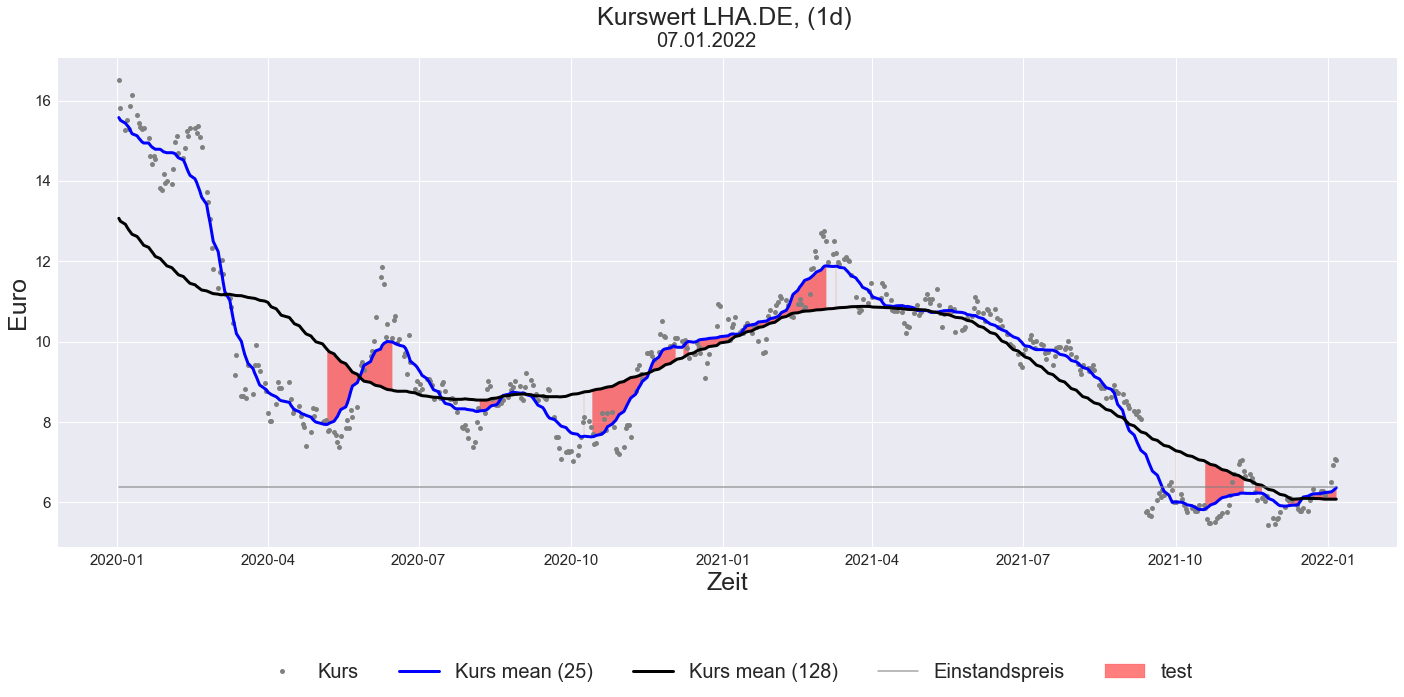

In [536]:
plt.figure(figsize=(24,9))
plt.style.use('seaborn')
plt.grid(True)


plt.plot(df["Date"], df["Kurs"], marker='.', linestyle='',
        color="grey", linewidth=3, label = "Kurs", markersize=10)


plt.plot(df["Date"], df["Kurs_mean_1"], marker='', linestyle='-',
        color="blue", linewidth=3, label = f'Kurs mean ({rolling_window1})', markersize=10)

plt.plot(df["Date"], df["Kurs_mean_2"], marker='', linestyle='-',
        color="black", linewidth=3, label = f'Kurs mean ({rolling_window2})', markersize=10)


# plt.fill_between(df["Date"], df["Kurs_mean_1"], df["Kurs_mean_2"], color='green', alpha=0.5,
#                  label=f'test',  where=(df["Kurs_mean_1"] > df["Kurs_mean_2"]))

plt.fill_between(df["Date"], df["Kurs_mean_1"], df["Kurs_mean_2"], color='red', alpha=0.5,
                 label=f'test',  where=(df["Steigung"] >= 0))

# Einstandspreis
plt.plot(df["Date"], df["Einstandspreis"], marker='', linestyle='-', alpha = 0.7,
        color="grey", linewidth=1.5, label = f'Einstandspreis', markersize=10)


# Legende
plt.legend(loc='upper center',
           bbox_to_anchor=(0.5, -0.2),
           fancybox=True,
           shadow=True,
           ncol=5,
           fontsize=20)

# Titel
plt.title(f'Kurswert {aktie}, ({interval}) \n', fontsize=25)
plt.suptitle(f'{today}', fontsize=20, y=0.92)

# Schriftgrößen x und y achsenwerte
plt.xticks(fontsize=15, rotation=0)
plt.yticks(fontsize=15)

plt.ylabel("Euro", fontsize=25)
plt.xlabel("Zeit", fontsize=25)


plt.savefig(f'D:\\Github\\Aktien\\Output\\{aktie}.png', dpi=300, bbox_inches='tight')

In [537]:
import numpy as np

# Now your list 
list = [('2018-10-29', 6.1925), ('2018-10-29', 6.195), ('2018-10-29', 1.95833333333333), 
        ('2018-10-29', 1.785), ('2018-10-29', 3.05), ('2018-10-29', 1.30666666666667), 
        ('2018-10-29', 1.6325), ('2018-10-30', 1.765), ('2018-10-30', 1.265), 
        ('2018-10-30', 2.1125), ('2018-10-30', 2.16714285714286), ('2018-10-30', 1.485), 
        ('2018-10-30', 1.72), ('2018-10-30', 2.754), ('2018-10-30', 1.79666666666667), 
        ('2018-10-30', 1.27833333333333), ('2018-10-30', 3.48), ('2018-10-30', 6.19), 
        ('2018-10-30', 6.235), ('2018-10-30', 6.11857142857143), ('2018-10-30', 6.088), 
        ('2018-10-30', 4.3), ('2018-10-30', 7.80666666666667), 
        ('2018-10-30', 7.78333333333333), ('2018-10-30', 10.9766666666667), 
        ('2018-10-30', 2.19), ('2018-10-30', 1.88)]

# Create a single pandas DataFrame
df = pd.DataFrame(list)

# Make it into a Time Series with 'date' and 'value' columns
ts = pd.DataFrame(list, columns=['date', 'value'])

#print it to check it
ts.head(10)

# Now separate it into x and y lists

x = ts['date']
y = ts['value'].astype(float)

# Create a sequance of integers from 0 to x.size to use in np.polyfit() call
x_seq = np.arange(x.size) # should give you [ 0  1  2  3  4 ... 26]

# call numpy polyfit() method with x_seq, y 
fit = np.polyfit(x_seq, y, 1)
fit_fn = np.poly1d(fit)

print('Slope = ', fit[0], ", ","Intercept = ", fit[1])
print(fit_fn)

Slope =  0.1366855921855924 ,  Intercept =  1.9827865961199287
 
0.1367 x + 1.983
